# Building a Linear Regression Model

## 1. Reading Data

In [1]:
X = []
Y = []
with open("singlevardata.txt",'r') as f:
    for line in f:
        i,j = line.split(',')
        X.append(float(i))
        Y.append(float(j))
print("X = ",X)
print("Y = ",Y)

X =  [4.94, -1.58, -4.45, -6.06, -1.22, -3.55, 0.36, -3.24, 1.31, 2.17, 2.94, -0.92, -0.91, 1.24, 1.56, -4.14, 3.75, 4.15, 0.33, 3.41, 2.27, 2.6, 1.06, 1.04, 2.74, -0.71, -2.75, 0.55, -3.45, 1.09, 2.47, -6.35, 1.83, -0.68, -3.83, -2.03, 3.13, 0.92, 4.02, 3.89, -1.81, 3.94, -2.0, 0.54, 0.78, 2.15, 2.55, -0.63, 1.06, -0.36]
Y =  [4.37, 1.7, 1.88, 0.56, 2.23, 1.53, 2.99, 0.48, 2.76, 3.99, 3.25, 2.27, 2.0, 4.75, 3.52, 1.39, 4.9, 4.44, 2.72, 4.59, 5.3, 3.43, 2.53, 3.69, 3.1, 2.72, 2.82, 3.53, 1.77, 4.61, 4.24, 1.0, 3.84, 2.42, 0.67, 1.07, 3.19, 4.21, 5.24, 3.94, 2.85, 4.86, 1.31, 3.99, 2.92, 4.72, 3.83, 2.58, 2.89, 1.99]


## 2. Spliting data set into training and testing

In [2]:
import numpy as np

ntrain = int(0.8 * len(X))
ntest = len(X) - ntrain

xtrain = np.array(X[:ntrain]).reshape((ntrain,1))
xtest = np.array(X[ntrain:]).reshape((ntest,1))

ytrain = np.array(Y[:ntrain])
ytest = np.array(Y[ntrain:])

## 3. Building a Model with LinearRegression()

In [3]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(xtrain,ytrain)
print("Coifficient : ",lr.coef_)
print("Intercept : ",lr.intercept_)
print("-"*30)
print("y =",round(lr.intercept_,2),"+",round(lr.coef_[0],2),"* x")

Coifficient :  [0.39217986]
Intercept :  2.9135444769492036
------------------------------
y = 2.91 + 0.39 * x


## Predict value using model on testing

In [4]:
ytest_predict = lr.predict(xtest)
print(list(zip(ytest,[round(i,2) for i in ytest_predict])))

[(2.85, 2.2), (4.86, 4.46), (1.31, 2.13), (3.99, 3.13), (2.92, 3.22), (4.72, 3.76), (3.83, 3.91), (2.58, 2.67), (2.89, 3.33), (1.99, 2.77)]


## Evaluate Model Accuracy

In [5]:
import sklearn.metrics as sm
print("Mean Absolute Error :",round(sm.mean_absolute_error(ytest,ytest_predict),2))
print("Mean Squared Error :",round(sm.mean_squared_error(ytest,ytest_predict),2))
print("Median Absolute Error :",round(sm.median_absolute_error(ytest,ytest_predict),2))
print("Explained Variance Score :",round(sm.explained_variance_score(ytest,ytest_predict),2))
print("R^2 Score :",round(sm.r2_score(ytest,ytest_predict),2))

Mean Absolute Error : 0.54
Mean Squared Error : 0.38
Median Absolute Error : 0.54
Explained Variance Score : 0.68
R^2 Score : 0.68


## Ploting the data

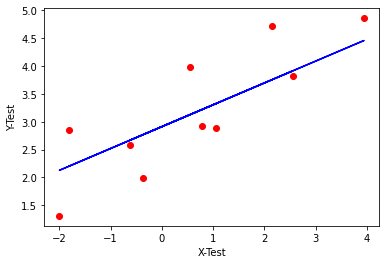

In [6]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,ytest_predict,color="blue")
plt.xlabel("X-Test")
plt.ylabel("Y-Test")
plt.show()

## Saving Model (Permenant Storage)

In [7]:
import pickle
filename = 'lrmodel.pkl'
pickle.dump(lr,open(filename,'wb'))

## Load Model And Predict Value

In [8]:
nlr = pickle.load(open(filename,'rb'))
ytest_predict_new = nlr.predict(xtest)
print(list(zip(ytest_predict,ytest_predict_new)))

x = [[2.75]]
y = nlr.predict(x)
y

[(2.203698923926712, 2.203698923926712), (4.458733139329654, 4.458733139329654), (2.129184749852528, 2.129184749852528), (3.125321603265306, 3.125321603265306), (3.219444770516907, 3.219444770516907), (3.75673118357813, 3.75673118357813), (3.9136031289974644, 3.9136031289974644), (2.666471162913751, 2.666471162913751), (3.3292551323104416, 3.3292551323104416), (2.772359726071802, 2.772359726071802)]


array([3.9920391])